<a href="https://colab.research.google.com/github/arsyaamalia/event-service-cbrs/blob/main/Skripsi_Content_Based_Recommendation_System_Eventhings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. INTRODUCTION**

*   ## **What is a Content-Based Recommendation System?**
A content-based recommendation system recommends items to users based on the content or characteristics of the items. This type of recommendation system focuses on understanding the properties of items and learning user preferences from the items they have interacted with in the past.

*   ## **How Does it Work?**
The working principle of a content-based recommendation system can be summarized in a few steps:
1.   Feature Extraction: Extract relevant features from the items. For example, in a movie recommendation system, features could include genre, director, actors, and plot keywords.
2.   User Profile: Create a user profile based on their interactions with items. This profile is essentially a summary of the features of items the user has liked or interacted with in the past.
3.   Recommendation: Calculate the similarity between the user profile and each item's features. Items that are most similar to the user profile are recommended.

---

# **2. EXPLORATORY DATA ANALYSIS (EDA)**

## **Import Python Libraries**

The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the [link](https://docs.google.com/spreadsheets/d/1eilNwyFzBFAzO2Z3vOJoqV7UGN6xBc65aOkLJ5nSdmA/edit?usp=sharing) to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

In [1]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00
time: 305 µs (started: 2024-06-10 19:00:31 +00:00)


In [2]:
pip install psutil

time: 7.64 s (started: 2024-06-10 19:00:31 +00:00)


In [3]:
# Import needed modules
import numpy as np
import pandas as pd
import nltk
import re
import difflib
import time
import psutil
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans

time: 3.68 s (started: 2024-06-10 19:00:39 +00:00)


## **Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

I will use a dataset containing event services/vendor information, including names, categories, locations, and descriptions.

In [4]:
# Read data
df = pd.read_csv('/content/Indonesia_Event_Service_Businesses_Indo.csv')

time: 60.4 ms (started: 2024-06-10 19:00:42 +00:00)


### **Analyzing the Data**

Before we make any inferences, we listen to our data by examining all variables in the data.

The main goal of data understanding is to gain general insights about the data, which covers the number of rows and columns, values in the data, datatypes, and Missing values in the dataset.

shape – shape will display the number of observations(rows) and features(columns) in the dataset

There are 3462 observations and 6 variables in our dataset

In [5]:
# printing the first 5 rows of the dataframe
df.head()

,no,kategori,subkategori,location/city,nama,deskripsi,address,contact,url,lat,lng
0,1,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...,NaN,NaN,NaN,NaN,NaN
1,2,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...,NaN,NaN,NaN,NaN,NaN
2,3,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...,NaN,NaN,NaN,NaN,NaN
3,4,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...,NaN,NaN,NaN,NaN,NaN
4,5,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...,NaN,NaN,NaN,NaN,NaN


time: 106 ms (started: 2024-06-10 19:00:42 +00:00)


In [6]:
# printing the last 5 rows of the dataframe
df.tail()

,no,kategori,subkategori,location/city,nama,deskripsi,address,contact,url,lat,lng
4501,4502,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,NaN,Jl. Taman Suryokusumo IV Pasar PKL Selter 1 Bl...,0877-8910-5550,https://maps.google.com/?cid=13343807366684347718,-6.978405,110.464499
4502,4503,Equipment/Rental,Tent,semarang,Kafe tenda,NaN,"Jl. Pahlawan No.2, Mugassari, Kec. Semarang Se...",NaN,https://maps.google.com/?cid=6253221563540260196,-6.996881,110.419691
4503,4504,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,NaN,"Jl. Brobudur Barat V/25 RT8/13, Kalipancur, Ke...",0819-0265-6457,https://maps.google.com/?cid=12486700668638141432,-6.999503,110.368743
4504,4505,Equipment/Rental,Tent,semarang,Warung tenda muda,NaN,"XFC5+JVC, Jl. Sambiroto VII, Sambiroto, Kec. T...",0858-7620-0035,https://maps.google.com/?cid=10406616885502580166,-7.028391,110.459647
4505,4506,Equipment/Rental,Tent,semarang,"Grosir Tenda lipat Murah ""AMIRA TENT""",NaN,"masjid baiturahim, Tawang Rajekwesi belakang N...",0882-2730-8407,https://maps.google.com/?cid=9508086783357841356,-6.972278,110.390687


time: 39.9 ms (started: 2024-06-10 19:00:43 +00:00)


**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   no             4506 non-null   int64  
 1   kategori       4506 non-null   object 
 2   subkategori    4506 non-null   object 
 3   location/city  4506 non-null   object 
 4   nama           4506 non-null   object 
 5   deskripsi      1700 non-null   object 
 6   address        2799 non-null   object 
 7   contact        2549 non-null   object 
 8   url            2799 non-null   object 
 9   lat            2799 non-null   float64
 10  lng            2799 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 387.4+ KB
time: 30.5 ms (started: 2024-06-10 19:00:43 +00:00)


### **Wordcloud**

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.

In [8]:
dftranspose = pd.DataFrame(df['deskripsi'])

# Transpose the column to a row (excluding the column name)
transposed = dftranspose.T.reset_index(drop=True)

# Export the transposed row to a TXT file
transposed.to_csv('output.txt', index=False, header=False)

time: 101 ms (started: 2024-06-10 19:00:43 +00:00)


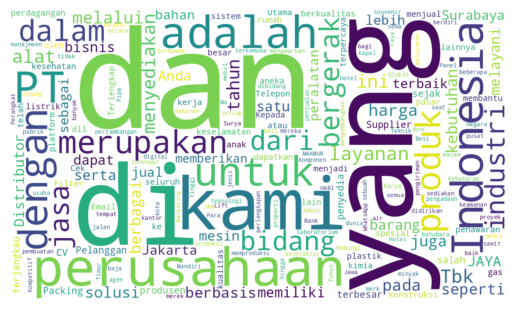

time: 3.32 s (started: 2024-06-10 19:00:43 +00:00)


In [9]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

#Importing Dataset
TXT_FILE = "output.txt"

#Creating the text variable
text = open(TXT_FILE, mode="r", encoding="utf-8").read()

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white', height=700, width=1200).generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# store to file
word_cloud.to_file("wordcloud_output.png")

### **Check for Duplication**

**nunique()** based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [10]:
df.nunique()

no               4506
kategori            3
subkategori        82
location/city     348
nama             3571
deskripsi        1079
address          2469
contact          2191
url              2484
lat              2476
lng              2475
dtype: int64

time: 14.3 ms (started: 2024-06-10 19:00:46 +00:00)


### **Missing Values Calculation**

**isnull()** is widely been in all pre-processing steps to identify null values in the data

In our example, **df.isnull().sum()** is used to get the number of missing records in each column

In [11]:
df.isnull().sum()

no                  0
kategori            0
subkategori         0
location/city       0
nama                0
deskripsi        2806
address          1707
contact          1957
url              1707
lat              1707
lng              1707
dtype: int64

time: 8.24 ms (started: 2024-06-10 19:00:46 +00:00)


## **Data Reduction**

Some columns or variables can be dropped if they do not add value to our analysis.

In our dataset, the column address, contact, url, lat, lng, assuming they don’t have any predictive power to predict the dependent variable.

In [12]:
# Remove address, contact, url, lat, lng columns from df
df = df.drop(['no', 'address','contact','url','lat','lng'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kategori       4506 non-null   object
 1   subkategori    4506 non-null   object
 2   location/city  4506 non-null   object
 3   nama           4506 non-null   object
 4   deskripsi      1700 non-null   object
dtypes: object(5)
memory usage: 176.1+ KB
time: 16 ms (started: 2024-06-10 19:00:46 +00:00)


We start our Feature Engineering as we need to add some columns required for analysis.

## **Feature Engineering**

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of Feature engineering is to create meaningful data from raw data.

We will extract relevant features from the dataset, such as kategori, subkategori, location/city, nama, and deskripsi.

In [13]:
# Selecting the relevant features for recommendation
selected_features = ['kategori','subkategori','location/city','nama','deskripsi']
print(selected_features)

['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']
time: 2.45 ms (started: 2024-06-10 19:00:46 +00:00)




---



# **3. PRE-PROCESSING DATA**

Data preprocessing is the process of transforming raw data into an understandable format. It is also an important step in data mining as we cannot work with raw data. The quality of the data should be checked before applying machine learning or data mining algorithms.

## **Data Cleaning**

Data cleaning is the process of removing incorrect data, incomplete data, and inaccurate data from the datasets, and it also replaces the missing values.

### **Removing Duplicate Data**

In [14]:
kategori_nama = df['kategori'] + ' ' + df['nama']
kategori_nama

0                               Media Partner Agrilabs.id
1                                Media Partner Agronesian
2                         Media Partner Petani Hobi Party
3                               Media Partner Ternaknesia
4                                Media Partner OKE Garden
                              ...                        
4501    Equipment/Rental Sewa Alat Camping Semarang WB...
4502                          Equipment/Rental Kafe tenda
4503    Equipment/Rental EnergyAdventure Rental Tenda ...
4504                   Equipment/Rental Warung tenda muda
4505    Equipment/Rental Grosir Tenda lipat Murah "AMI...
Length: 4506, dtype: object

time: 11.2 ms (started: 2024-06-10 19:00:46 +00:00)


In [15]:
# push to df
df = df.assign(kategori_nama=kategori_nama)
df

,kategori,subkategori,location/city,nama,deskripsi,kategori_nama
0,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...,Media Partner Agrilabs.id
1,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...,Media Partner Agronesian
2,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...,Media Partner Petani Hobi Party
3,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...,Media Partner Ternaknesia
4,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...,Media Partner OKE Garden
...,...,...,...,...,...,...
4501,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,NaN,Equipment/Rental Sewa Alat Camping Semarang WB...
4502,Equipment/Rental,Tent,semarang,Kafe tenda,NaN,Equipment/Rental Kafe tenda
4503,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,NaN,Equipment/Rental EnergyAdventure Rental Tenda ...
4504,Equipment/Rental,Tent,semarang,Warung tenda muda,NaN,Equipment/Rental Warung tenda muda


time: 53.2 ms (started: 2024-06-10 19:00:46 +00:00)


In [16]:
df.drop_duplicates(subset=['kategori_nama'], keep="first", inplace=True)

time: 7.37 ms (started: 2024-06-10 19:00:46 +00:00)


In [17]:
df.reset_index(inplace=True)
df

,index,kategori,subkategori,location/city,nama,deskripsi,kategori_nama
0,0,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...,Media Partner Agrilabs.id
1,1,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...,Media Partner Agronesian
2,2,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...,Media Partner Petani Hobi Party
3,3,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...,Media Partner Ternaknesia
4,4,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...,Media Partner OKE Garden
...,...,...,...,...,...,...,...
3567,4501,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,NaN,Equipment/Rental Sewa Alat Camping Semarang WB...
3568,4502,Equipment/Rental,Tent,semarang,Kafe tenda,NaN,Equipment/Rental Kafe tenda
3569,4503,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,NaN,Equipment/Rental EnergyAdventure Rental Tenda ...
3570,4504,Equipment/Rental,Tent,semarang,Warung tenda muda,NaN,Equipment/Rental Warung tenda muda


time: 43.4 ms (started: 2024-06-10 19:00:46 +00:00)


In [18]:
# Remove kategori_nama columns from df
df = df.drop(['index', 'kategori_nama'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kategori       3572 non-null   object
 1   subkategori    3572 non-null   object
 2   location/city  3572 non-null   object
 3   nama           3572 non-null   object
 4   deskripsi      1069 non-null   object
dtypes: object(5)
memory usage: 139.7+ KB
time: 12.8 ms (started: 2024-06-10 19:00:46 +00:00)


In [19]:
df.reset_index(inplace=True)
df

,index,kategori,subkategori,location/city,nama,deskripsi
0,0,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...
1,1,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...
2,2,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...
3,3,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...
4,4,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...
...,...,...,...,...,...,...
3567,3567,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,NaN
3568,3568,Equipment/Rental,Tent,semarang,Kafe tenda,NaN
3569,3569,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,NaN
3570,3570,Equipment/Rental,Tent,semarang,Warung tenda muda,NaN


time: 35.2 ms (started: 2024-06-10 19:00:46 +00:00)


In [20]:
df['index'] += 1
df

,index,kategori,subkategori,location/city,nama,deskripsi
0,1,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...
1,2,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...
2,3,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...
3,4,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...
4,5,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...
...,...,...,...,...,...,...
3567,3568,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,NaN
3568,3569,Equipment/Rental,Tent,semarang,Kafe tenda,NaN
3569,3570,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,NaN
3570,3571,Equipment/Rental,Tent,semarang,Warung tenda muda,NaN


time: 38.3 ms (started: 2024-06-10 19:00:46 +00:00)


### **Handling Missing Values**

We will replace all the missing values with null string (found 2800 missing values in deskripsi column before)

In [21]:
# Replacing the null valuess with null string
for feature in selected_features:
    df[feature] = df[feature].fillna('')

time: 8.47 ms (started: 2024-06-10 19:00:46 +00:00)


### **Remove Special Characters**

In [22]:
def cleaning(Text):
    Text = re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9,.]+',' ', Text)
    return Text

df['deskripsi'] = df['deskripsi'].apply(cleaning)

time: 42.4 ms (started: 2024-06-10 19:00:46 +00:00)


In [23]:
#save final dataset
df.to_csv('dataset.csv', sep=',', index=False)

time: 29.4 ms (started: 2024-06-10 19:00:47 +00:00)


### **Data Integration**

We will combine 5 features that are valuable to make a machine learning algorithm

In [24]:
# combining all the 5 selected features
combined_features = df['kategori'] + ' ' + df['subkategori'] + ' ' + df['location/city'] + ' ' + df['nama'] + ' ' + df['deskripsi']
combined_features

0       Media Partner Agriculture - Agrilabs.id Kami s...
1       Media Partner Agriculture - Agronesian Agrones...
2       Media Partner Agriculture - Petani Hobi Party ...
3       Media Partner Agriculture - Ternaknesia Ternak...
4       Media Partner Agriculture - OKE Garden Oke Gar...
                              ...                        
3567    Equipment/Rental Tent semarang Sewa Alat Campi...
3568           Equipment/Rental Tent semarang Kafe tenda 
3569    Equipment/Rental Tent semarang EnergyAdventure...
3570    Equipment/Rental Tent semarang Warung tenda muda 
3571    Equipment/Rental Tent semarang Grosir Tenda li...
Length: 3572, dtype: object

time: 13.7 ms (started: 2024-06-10 19:00:47 +00:00)


In [25]:
# push to df
df = df.assign(combined_features=combined_features)
df

,index,kategori,subkategori,location/city,nama,deskripsi,combined_features
0,1,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...,Media Partner Agriculture - Agrilabs.id Kami s...
1,2,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...,Media Partner Agriculture - Agronesian Agrones...
2,3,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...,Media Partner Agriculture - Petani Hobi Party ...
3,4,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...,Media Partner Agriculture - Ternaknesia Ternak...
4,5,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...,Media Partner Agriculture - OKE Garden Oke Gar...
...,...,...,...,...,...,...,...
3567,3568,Equipment/Rental,Tent,semarang,Sewa Alat Camping Semarang WB OUTDOOR,,Equipment/Rental Tent semarang Sewa Alat Campi...
3568,3569,Equipment/Rental,Tent,semarang,Kafe tenda,,Equipment/Rental Tent semarang Kafe tenda
3569,3570,Equipment/Rental,Tent,semarang,EnergyAdventure Rental Tenda Alat Outdoor,,Equipment/Rental Tent semarang EnergyAdventure...
3570,3571,Equipment/Rental,Tent,semarang,Warung tenda muda,,Equipment/Rental Tent semarang Warung tenda muda


time: 50.2 ms (started: 2024-06-10 19:00:47 +00:00)


## **Case Folding**

In this step data was collected are uniform cases or letters contained in each profile. Uniformizing letters was done from capital letters converted to lowercase letters.

In [26]:
df['case_folding'] = df['combined_features'].str.lower()

time: 6.34 ms (started: 2024-06-10 19:06:35 +00:00)


## **Tokenization**

In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

In [27]:
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens

df['tokenization']= df['case_folding'].apply(tokenization)

time: 32.7 ms (started: 2024-06-10 19:06:43 +00:00)


## **Stopword Removal**

Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

In [28]:
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&', 'yah', 'no', 'je', 'om', 'pru', 'sch',
                       'injirrr', 'ah', 'oena', 'bu', 'eh', 'n', 'anjir', 'jd', 'anj'])

list_stopwords = set(list_stopwords)

def stopwords_removal(Text):
  words = Text.split()
  return [word for word in words if word not in list_stopwords]

df['stopword_removal'] = df['case_folding'].apply(stopwords_removal)

time: 165 ms (started: 2024-06-10 19:06:46 +00:00)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Stemming**

It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.  For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.

In [29]:
!pip install swifter
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import swifter

#buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stemmed wrapper
def stemmed_wrapper(term):
  return stemmer.stem(term)

term_dict = {}

for Text in df['stopword_removal']:
  for term in Text:
    if term not in term_dict:
      term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

#memmulai stemming
def apply_stemmed_term(Text):
  return [term_dict[term] for term in Text]

df['stemming'] = df['stopword_removal'].swifter.apply(apply_stemmed_term)

Streaming output truncated to the last 5000 lines.
ritual : ritual
nikah : nikah
jin, : jin
kawin : kawin
musuh, : musuh
tumbal : tumbal
pesugihan : sugih
balik, : balik
tuyul, : tuyul
sore, : sore
bulus : bulus
jimbung, : jimbung
kandang : kandang
bubrah, : bubrah
ngujang : ngujang
tulung : tulung
tampomas : tampomas
sedulu : sedulu
psm : psm
privo : privo
sakurazy : sakurazy
medtecindo : medtecindo
panguwuh : panguwuh
terapis, : terap
pc : pc
laptop : laptop
notebook : notebook
https : https
nripsmgroup.wixsite.com : nripsmgroup wixsite com
suppliercont : suppliercont
bunaken : bunaken
tarsius : tarsius
minahasa : minahasa
berlibur : libur
melayani. : layan
objek : objek
kunjungi : kunjung
siladen, : siladen
monumen : monumen
yesus : yesus
memberkati, : kati
andalusia : andalusia
scientifica : scientifica
edelweiss : edelweiss
merapi, : rapi
sereh : sereh
wangi : wangi
merapi : rapi
valley, : valley
menembak : tembak
rudal : rudal
sasaran : sasar
terbang, : terbang
riset, : riset
out

Pandas Apply:   0%|          | 0/3572 [00:00<?, ?it/s]

time: 19min 51s (started: 2024-06-10 19:06:53 +00:00)


In [30]:
# stemming
stemming = df[['stemming']]

def fit_stemming(text):
    text = np.array(text)
    text = ' '.join(text)

    return text

df['stemming'] = df['stemming'].apply(lambda x: fit_stemming(x))
df.head()

,index,kategori,subkategori,location/city,nama,deskripsi,combined_features,case_folding,tokenization,stopword_removal,stemming
0,1,Media Partner,Agriculture,-,Agrilabs.id,Kami sedang mengembangkan teknologi untuk memb...,Media Partner Agriculture - Agrilabs.id Kami s...,media partner agriculture - agrilabs.id kami s...,[media partner agriculture - agrilabs.id kami ...,"[media, partner, agriculture, -, agrilabs.id, ...",media partner agriculture - agrilabs id kemban...
1,2,Media Partner,Agriculture,-,Agronesian,Agronesian adalah perusahaan startup pertanian...,Media Partner Agriculture - Agronesian Agrones...,media partner agriculture - agronesian agrones...,[media partner agriculture - agronesian agrone...,"[media, partner, agriculture, -, agronesian, a...",media partner agriculture - agronesian agrones...
2,3,Media Partner,Agriculture,-,Petani Hobi Party,Petani Hobi Party merupakan peternakan unggas ...,Media Partner Agriculture - Petani Hobi Party ...,media partner agriculture - petani hobi party ...,[media partner agriculture - petani hobi party...,"[media, partner, agriculture, -, petani, hobi,...",media partner agriculture - tani hobi party ta...
3,4,Media Partner,Agriculture,-,Ternaknesia,Ternaknesia adalah solusi menyeluruh bagi pete...,Media Partner Agriculture - Ternaknesia Ternak...,media partner agriculture - ternaknesia ternak...,[media partner agriculture - ternaknesia terna...,"[media, partner, agriculture, -, ternaknesia, ...",media partner agriculture - ternaknesia ternak...
4,5,Media Partner,Agriculture,-,OKE Garden,Oke Garden adalah platform digital yang menyed...,Media Partner Agriculture - OKE Garden Oke Gar...,media partner agriculture - oke garden oke gar...,[media partner agriculture - oke garden oke ga...,"[media, partner, agriculture, -, oke, garden, ...",media partner agriculture - oke garden oke gar...


time: 204 ms (started: 2024-06-10 19:26:45 +00:00)


In [31]:
#save processed data
df['stemming'].to_csv('datamodel.csv', sep=',', index=False)

time: 27.4 ms (started: 2024-06-10 19:26:45 +00:00)


# **4. BUILDING CONTENT-BASED RECOMMENDATION SYSTEMS (CBRS)**

In [33]:
dfclean = pd.read_csv('/content/datamodel.csv')
dfclean.head()

,stemming
0,media partner agriculture - agrilabs id kemban...
1,media partner agriculture - agronesian agrones...
2,media partner agriculture - tani hobi party ta...
3,media partner agriculture - ternaknesia ternak...
4,media partner agriculture - oke garden oke gar...


time: 47.7 ms (started: 2024-06-10 19:33:19 +00:00)


## **Term Frequency**

The term is frequency measure of a word w in a document (text) d. It is equal to the number of instances of word w in document d divided by the total number of words in document d. Term frequency serves as a metric to determine a word’s occurrence in a document as compared to the total number of words in a document. The denominator is always the same.

### **TF-IDF**

We use TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to convert text features (descriptions) into numerical vectors.
TF-IDF gives more weight to terms that are important in a specific document and less weight to common terms.

In [34]:
# converting the text data to feature vectors
vectorizer_tfidf = TfidfVectorizer()

tfidf_matrix = vectorizer_tfidf.fit_transform(dfclean['stemming'])

time: 221 ms (started: 2024-06-10 19:33:25 +00:00)


In [35]:
print(tfidf_matrix)

  (0, 5840)	0.17254659703359743
  (0, 9240)	0.1635362395147648
  (0, 5063)	0.09053110798313432
  (0, 7168)	0.15064476826545017
  (0, 9185)	0.21380110936236849
  (0, 5072)	0.1696567213520084
  (0, 4527)	0.15064476826545017
  (0, 7016)	0.2328130624489267
  (0, 3658)	0.20768062752512487
  (0, 2772)	0.175777203189252
  (0, 5273)	0.15064476826545017
  (0, 1677)	0.2328130624489267
  (0, 9223)	0.17411436375458347
  (0, 6924)	0.19845171546000742
  (0, 10013)	0.20768062752512487
  (0, 6763)	0.2328130624489267
  (0, 7841)	0.2328130624489267
  (0, 2410)	0.324920952255983
  (0, 5758)	0.18866867443856664
  (0, 5396)	0.16142531741249103
  (0, 9810)	0.07772596520302875
  (0, 2198)	0.2682887228160641
  (0, 9313)	0.14241336432593277
  (0, 5431)	0.12191843114057264
  (0, 4734)	0.10048983223409368
  :	:
  (3568, 8543)	0.33275328539827986
  (3569, 3771)	0.6773547845505306
  (3569, 9364)	0.2651979922134553
  (3569, 7060)	0.4114404312241664
  (3569, 8061)	0.2158984295509058
  (3569, 3800)	0.1080764389243205

### **TF-RF**

To implement **Term Frequency-Reversed Frequency (TF-RF)** vectorization, we need to modify the typical TF-IDF approach. In TF-RF, the document frequency is replaced by the "reversed frequency," which measures how often a term does not appear in documents. This can highlight terms that are rare in the dataset overall, but frequent in specific documents.

In [36]:
# Step 1: Compute Term Frequency (TF)
vectorizer_tfrf = CountVectorizer()
tf_matrix = vectorizer_tfrf.fit_transform(dfclean['stemming'])
tf_array = tf_matrix.toarray()

# Step 2: Compute Document Frequency (DF)
doc_freq = np.sum(tf_array > 0, axis=0)

# Step 3: Compute Reversed Frequency (RF)
N = tf_array.shape[0]
rf = np.log((N / (N - doc_freq + 1)))

# Step 4: Compute TF-RF
tfrf = tf_array * rf

# Convert to sparse matrix format (similar to tfidf_matrix)
from scipy.sparse import csr_matrix
tfrf_matrix = csr_matrix(tfrf)

time: 1.1 s (started: 2024-06-10 19:33:26 +00:00)


In [37]:
print(tfrf_matrix)

  (0, 1552)	0.009281461650926214
  (0, 2198)	0.04015404208344777
  (0, 2410)	0.013483197133838906
  (0, 2772)	0.003927073770609144
  (0, 3658)	0.000840218506229355
  (0, 4527)	0.01069528911674795
  (0, 4734)	0.07165598890643515
  (0, 5063)	0.10498731169753264
  (0, 5072)	0.005051933281793014
  (0, 5273)	0.01069528911674795
  (0, 5396)	0.007023487222767736
  (0, 5431)	0.03185707394461971
  (0, 5758)	0.002242153405689727
  (0, 5840)	0.0044893453625945556
  (0, 6375)	0.07859731751631635
  (0, 6924)	0.0014007566374981929
  (0, 7168)	0.01069528911674795
  (0, 7227)	0.06148235238409702
  (0, 9185)	0.0005600672227049029
  (0, 9223)	0.004208170047934541
  (0, 9240)	0.006459789349893293
  (0, 9313)	0.014664673404246998
  (0, 9810)	0.17351387401305932
  (0, 10013)	0.000840218506229355
  (1, 1552)	0.009281461650926214
  :	:
  (3568, 9353)	0.07015335902190022
  (3568, 9364)	0.10250283836987083
  (3569, 1657)	0.06327019553016117
  (3569, 3800)	1.2082746906946362
  (3569, 7060)	0.015233016698886175


### **TF-ABS**

To implement **Term Frequency-Absolute Frequency (TF-ABS)** vectorization, we need to adjust the typical TF-IDF approach. In TF-ABS, we combine the term frequency (TF) with the absolute frequency (ABS) which is simply the raw count of terms in the entire corpus.

In [38]:
# Step 1: Calculate term frequency (TF)
vectorizer_tfabs = CountVectorizer()
term_freq_matrix = vectorizer_tfabs.fit_transform(dfclean['stemming'])

# Normalize the term frequency matrix to get TF
tf_matrix = normalize(term_freq_matrix, norm='l1', axis=1)

# Step 2: Compute Absolute Frequency (ABS)
abs_freq = np.asarray(term_freq_matrix.sum(axis=0)).flatten()

# Step 3: Combine TF and ABS to get TF-ABS
tf_abs_matrix = tf_matrix.multiply(abs_freq)

# Convert to sparse matrix format (similar to tfidf_matrix)
from scipy.sparse import csr_matrix
tfabs_matrix = csr_matrix(tf_abs_matrix)

time: 159 ms (started: 2024-06-10 19:33:27 +00:00)


In [39]:
print(tfabs_matrix)

  (0, 1552)	1.096774193548387
  (0, 1553)	0.03225806451612903
  (0, 1677)	0.03225806451612903
  (0, 2198)	5.225806451612903
  (0, 2410)	2.129032258064516
  (0, 2772)	0.5806451612903225
  (0, 3658)	0.12903225806451613
  (0, 4527)	1.3870967741935483
  (0, 4734)	11.935483870967742
  (0, 5063)	12.806451612903226
  (0, 5072)	0.6129032258064516
  (0, 5273)	1.4516129032258065
  (0, 5396)	1.2580645161290323
  (0, 5431)	5.096774193548387
  (0, 5758)	0.4193548387096774
  (0, 5840)	0.6129032258064516
  (0, 6375)	10.548387096774194
  (0, 6763)	0.03225806451612903
  (0, 6924)	0.3870967741935484
  (0, 7016)	0.03225806451612903
  (0, 7168)	1.3225806451612903
  (0, 7227)	6.935483870967742
  (0, 7841)	0.03225806451612903
  (0, 9185)	0.16129032258064516
  (0, 9223)	0.5161290322580645
  :	:
  (3568, 9364)	59.5
  (3569, 1657)	36.0
  (3569, 3771)	0.1111111111111111
  (3569, 3800)	280.3333333333333
  (3569, 7060)	6.555555555555555
  (3569, 8061)	585.3333333333333
  (3569, 8543)	57.22222222222222
  (3569, 93

### **TF-PDF**

To implement Term Frequency-Probabilistic Document Frequency (TF-PDF) vectorization, we need to modify the typical TF-IDF approach. In TF-PDF, the inverse document frequency (IDF) is replaced by the probabilistic document frequency (PDF), which is computed differently to emphasize the probability-based weighting of terms.

In [40]:
# Step 1: Calculate Term Frequency (TF)
vectorizer_tfpdf = CountVectorizer()
term_freq_matrix = vectorizer_tfpdf.fit_transform(dfclean['stemming'])

# Normalize the term frequency matrix to get TF
tf_matrix = normalize(term_freq_matrix, norm='l1', axis=1)

# Step 2: Compute Document Frequency (DF)
doc_frequency = (term_freq_matrix > 0).sum(axis=0)
doc_frequency = np.asarray(doc_frequency).flatten()

# Step 3: Compute Probabilistic Document Frequency (PDF)
N = term_freq_matrix.shape[0]
pdf = np.log((N - doc_frequency + 0.5) / (doc_frequency + 0.5))

# Step 4: Combine TF and PDF to get TF-PDF
tf_pdf_matrix = tf_matrix.multiply(pdf)

# Convert to sparse matrix format (similar to tfidf_vectors)
from scipy.sparse import csr_matrix
tfpdf_matrix = csr_matrix(tf_pdf_matrix)

time: 164 ms (started: 2024-06-10 19:33:27 +00:00)


In [41]:
print(tfpdf_matrix)

  (0, 1552)	0.14937093107995242
  (0, 1553)	0.250815349886673
  (0, 1677)	0.250815349886673
  (0, 2198)	0.2501338408101047
  (0, 2410)	0.3184077391528914
  (0, 2772)	0.17535397761415505
  (0, 3658)	0.21534913618176926
  (0, 4527)	0.14495946736205914
  (0, 4734)	0.08366553936470407
  (0, 5063)	0.07085815430454372
  (0, 5072)	0.16791205957087899
  (0, 5273)	0.14495946736205914
  (0, 5396)	0.15795392734354724
  (0, 5431)	0.11022827458120671
  (0, 5758)	0.1912002157527558
  (0, 5840)	0.17142097091593886
  (0, 6375)	0.0805861306535689
  (0, 6763)	0.250815349886673
  (0, 6924)	0.20346896209085488
  (0, 7016)	0.250815349886673
  (0, 7168)	0.14495946736205914
  (0, 7227)	0.08873999955931765
  (0, 7841)	0.250815349886673
  (0, 9185)	0.22346509162732733
  (0, 9223)	0.17332812300861403
  :	:
  (3568, 9364)	0.37028657384613495
  (3569, 1657)	0.3023959911409925
  (3569, 3771)	0.8639195384985402
  (3569, 3800)	-0.09494501097690587
  (3569, 7060)	0.4610136409151283
  (3569, 8061)	-0.19107940326137518

## **Similarity Scores**

**Similarity Scores** are based on comparing one data object with another, attribute by attribute, usually summing the squares of the differences in magnitude for each attribute, and using the calculation to compute a final outcome, known as the correlation score.

### **Cosine Similarity**

From this, we can compute a user-user similarity between two users using the cosine similarity formula.

Cosine similarity means the similarity between two vectors of inner product space. It is measured by the cosine of the angle between two non-zero vectors and is used to determine how similar two items are based on their feature vectors.

In [42]:
# getting the similarity scores using cosine similarity with TF-IDF matrix
tfidf_cosine = cosine_similarity(tfidf_matrix, tfidf_matrix)

time: 339 ms (started: 2024-06-10 19:33:30 +00:00)


In [43]:
print(tfidf_cosine)

[[1.         0.13948797 0.07967842 ... 0.         0.         0.        ]
 [0.13948797 1.         0.14422584 ... 0.         0.         0.        ]
 [0.07967842 0.14422584 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.26348082 0.27441515]
 [0.         0.         0.         ... 0.26348082 1.         0.27084403]
 [0.         0.         0.         ... 0.27441515 0.27084403 1.        ]]
time: 3.43 ms (started: 2024-06-10 19:33:30 +00:00)


In [44]:
# getting the similarity scores using cosine similarity with TF-RF matrix
tfrf_cosine = cosine_similarity(tfrf_matrix, tfrf_matrix)

time: 348 ms (started: 2024-06-10 19:33:30 +00:00)


In [45]:
print(tfrf_cosine)

[[1.         0.53409658 0.19954696 ... 0.         0.         0.        ]
 [0.53409658 1.         0.56731178 ... 0.         0.         0.        ]
 [0.19954696 0.56731178 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.94820123 0.94529884]
 [0.         0.         0.         ... 0.94820123 1.         0.99810938]
 [0.         0.         0.         ... 0.94529884 0.99810938 1.        ]]
time: 4.34 ms (started: 2024-06-10 19:33:31 +00:00)


In [46]:
# getting the similarity scores using cosine similarity with TF-ABS matrix
tfabs_cosine = cosine_similarity(tfabs_matrix, tfabs_matrix)

time: 344 ms (started: 2024-06-10 19:33:31 +00:00)


In [47]:
print(tfabs_cosine)

[[1.         0.5750044  0.12175231 ... 0.         0.         0.        ]
 [0.5750044  1.         0.58989647 ... 0.         0.         0.        ]
 [0.12175231 0.58989647 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.94742951 0.9399197 ]
 [0.         0.         0.         ... 0.94742951 1.         0.99511104]
 [0.         0.         0.         ... 0.9399197  0.99511104 1.        ]]
time: 2.97 ms (started: 2024-06-10 19:33:31 +00:00)


In [48]:
# getting the similarity scores using cosine similarity with TF-PDF matrix
tfpdf_cosine = cosine_similarity(tfpdf_matrix, tfpdf_matrix)

time: 363 ms (started: 2024-06-10 19:33:31 +00:00)


In [49]:
print(tfpdf_cosine)

[[1.         0.12376896 0.06985603 ... 0.         0.         0.        ]
 [0.12376896 1.         0.12980296 ... 0.         0.         0.        ]
 [0.06985603 0.12980296 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.17569276 0.19094281]
 [0.         0.         0.         ... 0.17569276 1.         0.18539832]
 [0.         0.         0.         ... 0.19094281 0.18539832 1.        ]]
time: 1.89 ms (started: 2024-06-10 19:33:31 +00:00)


### **Jaccard Similarity**

Calculates the Jaccard similarity for the binary representation of the TF-IDF matrix, which measures the similarity between sets.

In [50]:
# getting the similarity scores using jaccard similarity with TF-IDF matrix
tfidf_binary = (tfidf_matrix > 0).astype(int)
jaccard_distances = pdist(tfidf_binary.toarray(), metric='jaccard')
tfidf_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfidf_jaccard, 1.0)

time: 4min 8s (started: 2024-06-10 19:33:37 +00:00)


In [51]:
print(tfidf_jaccard)

[[1.         0.14285714 0.07272727 ... 0.         0.         0.        ]
 [0.14285714 1.         0.11363636 ... 0.         0.         0.        ]
 [0.07272727 0.11363636 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.5        0.41666667]
 [0.         0.         0.         ... 0.5        1.         0.45454545]
 [0.         0.         0.         ... 0.41666667 0.45454545 1.        ]]
time: 2.41 ms (started: 2024-06-10 19:37:46 +00:00)


In [ ]:
# getting the similarity scores using jaccard similarity with TF-RF matrix
tfrf_binary = (tfrf_matrix > 0).astype(int)
jaccard_distances = pdist(tfrf_binary.toarray(), metric='jaccard')
tfrf_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfrf_jaccard, 1.0)

time: 4min 7s (started: 2024-06-09 06:13:49 +00:00)


In [ ]:
print(tfrf_jaccard)

[[1.         0.16666667 0.08695652 ... 0.         0.         0.        ]
 [0.16666667 1.         0.12820513 ... 0.         0.         0.        ]
 [0.08695652 0.12820513 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.55555556 0.45454545]
 [0.         0.         0.         ... 0.55555556 1.         0.45454545]
 [0.         0.         0.         ... 0.45454545 0.45454545 1.        ]]
time: 2.2 ms (started: 2024-06-09 06:17:56 +00:00)


In [ ]:
# getting the similarity scores using jaccard similarity with TF-ABS matrix
tfabs_binary = (tfabs_matrix > 0).astype(int)
jaccard_distances = pdist(tfabs_binary.toarray(), metric='jaccard')
tfabs_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfabs_jaccard, 1.0)

time: 3min 47s (started: 2024-06-09 06:17:56 +00:00)


In [ ]:
print(tfabs_jaccard)

[[1.         0.14285714 0.07272727 ... 0.         0.         0.        ]
 [0.14285714 1.         0.11363636 ... 0.         0.         0.        ]
 [0.07272727 0.11363636 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.5        0.41666667]
 [0.         0.         0.         ... 0.5        1.         0.45454545]
 [0.         0.         0.         ... 0.41666667 0.45454545 1.        ]]
time: 2.14 ms (started: 2024-06-09 06:21:43 +00:00)


In [ ]:
# getting the similarity scores using jaccard similarity with TF-PDF matrix
tfpdf_binary = (tfpdf_matrix > 0).astype(int)
jaccard_distances = pdist(tfpdf_binary.toarray(), metric='jaccard')
tfpdf_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfpdf_jaccard, 1.0)

time: 3min 47s (started: 2024-06-09 06:21:43 +00:00)


In [ ]:
print(tfpdf_jaccard)

[[1.         0.14285714 0.07272727 ... 0.         0.         0.        ]
 [0.14285714 1.         0.11363636 ... 0.         0.         0.        ]
 [0.07272727 0.11363636 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.375      0.3       ]
 [0.         0.         0.         ... 0.375      1.         0.33333333]
 [0.         0.         0.         ... 0.3        0.33333333 1.        ]]
time: 3.2 ms (started: 2024-06-09 06:25:31 +00:00)


# **5. TEST RECOMMENDATION SYSTEMS**

Store recommendations for each scenario

In [52]:
# SCENARIO 1

def get_recommendations_1(index, tfidf_cosine):
    # Get similarity scores for the given product
    sim_services = list(enumerate(tfidf_cosine[index]))

    # Sort products based on similarity scores
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)

    # Get indices of top 10 products (ignoring the product itself)
    sim_services = sim_services[1:11]

    # Return top 10 products
    top_indices = [i[0] for i in sim_services]
    return top_indices

# Example: Get recommendations for a specific business index
index_input = 744
top_10_recommendations_1 = df.iloc[get_recommendations_1(index_input, tfidf_cosine)][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_1)

Layanan yang dipilih: Pandawa Computer & Setting
10 Rekomendasi:
              kategori    subkategori location/city  \
2648  Equipment/Rental       Printing       bandung   
876            Sponsor  Media Promosi             -   
2715  Equipment/Rental       Printing      makassar   
745            Sponsor             IT             -   
2519  Equipment/Rental       Printing       jakarta   
2468  Equipment/Rental       Printing       jakarta   
2532  Equipment/Rental       Printing       jakarta   
2818  Equipment/Rental       Printing         medan   
2763  Equipment/Rental       Printing         medan   
2545  Equipment/Rental       Printing       jakarta   

                                                   nama  \
2648                                       Raja Setting   
876                           percetakan murah surabaya   
2715  Cetak cantik (percetakan & desain online MAKAS...   
745                   IT Kilat | Cv. Kaffah Global Jaya   
2519  Percetakan 24 jam , cetak br

In [53]:
# SCENARIO 2

def get_recommendations_2(index, tfrf_cosine):
    # Get similarity scores for the given product
    sim_services = list(enumerate(tfrf_cosine[index]))

    # Sort products based on similarity scores
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)

    # Get indices of top 10 products (ignoring the product itself)
    sim_services = sim_services[1:11]

    # Return top 10 products
    top_indices = [i[0] for i in sim_services]
    return top_indices

# Example: Get recommendations for a specific business index
index_input = 744
top_10_recommendations_2 = df.iloc[get_recommendations_2(index_input, tfrf_cosine)][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_2)

Layanan yang dipilih: Pandawa Computer & Setting
10 Rekomendasi:
     kategori                       subkategori location/city  \
982   Sponsor                        Percetakan             -   
876   Sponsor                     Media Promosi             -   
976   Sponsor                        Percetakan             -   
816   Sponsor                 Komputer & Laptop             -   
911   Sponsor                          Otomotif             -   
942   Sponsor               Pakaian & Aksesoris             -   
978   Sponsor                        Percetakan             -   
901   Sponsor                          Otomotif             -   
1014  Sponsor  Telekomunikasi & Perlengkapannya             -   
1019  Sponsor  Telekomunikasi & Perlengkapannya             -   

                               nama  \
982                     Prima Print   
876       percetakan murah surabaya   
976                CV. KARYA SEJATI   
816            Yang Master Komputer   
911             Rekayasa

In [54]:
# SCENARIO 3

def get_recommendations_3(index, tfabs_cosine):
    # Get similarity scores for the given product
    sim_services = list(enumerate(tfabs_cosine[index]))

    # Sort products based on similarity scores
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)

    # Get indices of top 10 products (ignoring the product itself)
    sim_services = sim_services[1:11]

    # Return top 10 products
    top_indices = [i[0] for i in sim_services]
    return top_indices

# Example: Get recommendations for a specific business index
index_input = 744
top_10_recommendations_3 = df.iloc[get_recommendations_3(index_input, tfabs_cosine)][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_3)

Layanan yang dipilih: Pandawa Computer & Setting
10 Rekomendasi:
     kategori                       subkategori location/city  \
982   Sponsor                        Percetakan             -   
876   Sponsor                     Media Promosi             -   
976   Sponsor                        Percetakan             -   
816   Sponsor                 Komputer & Laptop             -   
901   Sponsor                          Otomotif             -   
911   Sponsor                          Otomotif             -   
962   Sponsor            Pelatihan & Pendidikan             -   
722   Sponsor        Hiburan & Destinasi Wisata             -   
1014  Sponsor  Telekomunikasi & Perlengkapannya             -   
960   Sponsor            Pelatihan & Pendidikan             -   

                               nama  \
982                     Prima Print   
876       percetakan murah surabaya   
976                CV. KARYA SEJATI   
816            Yang Master Komputer   
901          CV. RO KARG

In [55]:
# SCENARIO 4

def get_recommendations_4(index, tfpdf_cosine):
    # Get similarity scores for the given product
    sim_services = list(enumerate(tfpdf_cosine[index]))

    # Sort products based on similarity scores
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)

    # Get indices of top 10 products (ignoring the product itself)
    sim_services = sim_services[1:11]

    # Return top 10 products
    top_indices = [i[0] for i in sim_services]
    return top_indices

# Example: Get recommendations for a specific business index
index_input = 744
top_10_recommendations_4 = df.iloc[get_recommendations_4(index_input, tfpdf_cosine)][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_4)

Layanan yang dipilih: Pandawa Computer & Setting
10 Rekomendasi:
              kategori    subkategori location/city  \
2648  Equipment/Rental       Printing       bandung   
745            Sponsor             IT             -   
2715  Equipment/Rental       Printing      makassar   
2532  Equipment/Rental       Printing       jakarta   
876            Sponsor  Media Promosi             -   
2545  Equipment/Rental       Printing       jakarta   
2468  Equipment/Rental       Printing       jakarta   
2417  Equipment/Rental       Printing      surabaya   
2519  Equipment/Rental       Printing       jakarta   
748            Sponsor             IT             -   

                                                   nama  \
2648                                       Raja Setting   
745                   IT Kilat | Cv. Kaffah Global Jaya   
2715  Cetak cantik (percetakan & desain online MAKAS...   
2532                                       Tempat Cetak   
876                           perc

In [56]:
# SCENARIO 5

def get_recommendations_5(index, tfidf_jaccard):
    # Get similarity scores for the given product
    sim_services = list(enumerate(tfidf_jaccard[index]))

    # Sort products based on similarity scores
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)

    # Get indices of top 10 products (ignoring the product itself)
    sim_services = sim_services[1:11]

    # Return top 10 products
    top_indices = [i[0] for i in sim_services]
    return top_indices

# Example: Get recommendations for a specific business index
index_input = 744
top_10_recommendations_5 = df.iloc[get_recommendations_5(index_input, tfidf_jaccard)][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_5)

Layanan yang dipilih: Pandawa Computer & Setting
10 Rekomendasi:
     kategori    subkategori location/city  \
750   Sponsor             IT             -   
745   Sponsor             IT             -   
736   Sponsor             IT             -   
748   Sponsor             IT             -   
1033  Sponsor    Travel Tour             -   
980   Sponsor     Percetakan             -   
749   Sponsor             IT             -   
864   Sponsor  Media Promosi             -   
1035  Sponsor    Travel Tour             -   
747   Sponsor             IT             -   

                                                   nama  \
750                         PT. Elang Sarana Multimedia   
745                   IT Kilat | Cv. Kaffah Global Jaya   
736                                 Netsolusi Teknologi   
748                                  Multidata Computer   
1033                                      Nabawi Market   
980                               Usaha Mandiri Plastik   
749            

# **6. EVALUATION**

This function calculates the diversity of recommendations by computing the average similarity between item pairs and subtracting it from 1.

In [57]:
# SCENARIO 1

def calculate_diversity_1(recommendation_indices, similarity_matrix):
    n = len(recommendation_indices)
    if n <= 1:
        return 0

    dissimilarity_sum = 0
    for i in range(n):
        for j in range(i + 1, n):
            dissimilarity_sum += 1 - similarity_matrix[recommendation_indices[i], recommendation_indices[j]]

    # Normalize the dissimilarity sum by the number of pairs
    diversity_score = dissimilarity_sum / (n / 2 * (n - 1))
    return diversity_score

# Collect recommendations for all indices in the dataframe
recommended_items_list_1 = [get_recommendations_1(index, tfidf_cosine) for index in range(len(dfclean))]

# Calculate diversity for each list of recommendations
diversity_values_1 = [calculate_diversity_1(recommendations, tfidf_cosine) for recommendations in recommended_items_list_1]

# Calculate the average diversity value
average_diversity_1 = np.mean(diversity_values_1)
print(f"Average Diversity value: {average_diversity_1:.2f}")

Average Diversity value: 0.60
time: 7.71 s (started: 2024-06-10 19:37:46 +00:00)


In [58]:
# SCENARIO 2

def calculate_diversity_2(recommendation_indices, similarity_matrix):
    n = len(recommendation_indices)
    if n <= 1:
        return 0

    dissimilarity_sum = 0
    for i in range(n):
        for j in range(i + 1, n):
            dissimilarity_sum += 1 - similarity_matrix[recommendation_indices[i], recommendation_indices[j]]

    # Normalize the dissimilarity sum by the number of pairs
    diversity_score = dissimilarity_sum / (n / 2 * (n - 1))
    return diversity_score

# Collect recommendations for all indices in the dataframe
recommended_items_list_2 = [get_recommendations_2(index, tfrf_cosine) for index in range(len(dfclean))]

# Calculate diversity for each list of recommendations
diversity_values_2 = [calculate_diversity_2(recommendations, tfrf_cosine) for recommendations in recommended_items_list_2]

# Calculate the average diversity value
average_diversity_2 = np.mean(diversity_values_2)
print(f"Average Diversity value: {average_diversity_2:.2f}")

Average Diversity value: 0.03
time: 5.87 s (started: 2024-06-10 19:37:54 +00:00)


In [59]:
# SCENARIO 3

def calculate_diversity_3(recommendation_indices, similarity_matrix):
    n = len(recommendation_indices)
    if n <= 1:
        return 0

    dissimilarity_sum = 0
    for i in range(n):
        for j in range(i + 1, n):
            dissimilarity_sum += 1 - similarity_matrix[recommendation_indices[i], recommendation_indices[j]]

    # Normalize the dissimilarity sum by the number of pairs
    diversity_score = dissimilarity_sum / (n / 2 * (n - 1))
    return diversity_score

# Collect recommendations for all indices in the dataframe
recommended_items_list_3 = [get_recommendations_3(index, tfabs_cosine) for index in range(len(dfclean))]

# Calculate diversity for each list of recommendations
diversity_values_3 = [calculate_diversity_3(recommendations, tfabs_cosine) for recommendations in recommended_items_list_3]

# Calculate the average diversity value
average_diversity_3 = np.mean(diversity_values_3)
print(f"Average Diversity value: {average_diversity_3:.2f}")

Average Diversity value: 0.04
time: 7.56 s (started: 2024-06-10 19:38:00 +00:00)


In [60]:
# SCENARIO 4

def calculate_diversity_4(recommendation_indices, similarity_matrix):
    n = len(recommendation_indices)
    if n <= 1:
        return 0

    dissimilarity_sum = 0
    for i in range(n):
        for j in range(i + 1, n):
            dissimilarity_sum += 1 - similarity_matrix[recommendation_indices[i], recommendation_indices[j]]

    # Normalize the dissimilarity sum by the number of pairs
    diversity_score = dissimilarity_sum / (n / 2 * (n - 1))
    return diversity_score

# Collect recommendations for all indices in the dataframe
recommended_items_list_4 = [get_recommendations_4(index, tfpdf_cosine) for index in range(len(dfclean))]

# Calculate diversity for each list of recommendations
diversity_values_4 = [calculate_diversity_4(recommendations, tfpdf_cosine) for recommendations in recommended_items_list_4]

# Calculate the average diversity value
average_diversity_4 = np.mean(diversity_values_4)
print(f"Average Diversity value: {average_diversity_4:.2f}")

Average Diversity value: 0.66
time: 6.13 s (started: 2024-06-10 19:38:07 +00:00)


In [61]:
# SCENARIO 5

def calculate_diversity_5(recommendation_indices, similarity_matrix):
    n = len(recommendation_indices)
    if n <= 1:
        return 0

    dissimilarity_sum = 0
    for i in range(n):
        for j in range(i + 1, n):
            dissimilarity_sum += 1 - similarity_matrix[recommendation_indices[i], recommendation_indices[j]]

    # Normalize the dissimilarity sum by the number of pairs
    diversity_score = dissimilarity_sum / (n / 2 * (n - 1))
    return diversity_score

# Collect recommendations for all indices in the dataframe
recommended_items_list_5 = [get_recommendations_5(index, tfidf_jaccard) for index in range(len(dfclean))]

# Calculate diversity for each list of recommendations
diversity_values_5 = [calculate_diversity_5(recommendations, tfidf_jaccard) for recommendations in recommended_items_list_5]

# Calculate the average diversity value
average_diversity_5 = np.mean(diversity_values_5)
print(f"Average Diversity value: {average_diversity_5:.2f}")

Average Diversity value: 0.49
time: 8.53 s (started: 2024-06-10 19:38:13 +00:00)




---



# **7. FULL RECOMMENDATION SYSTEMS**

In [ ]:
# SKENARIO 1

start_time_1 = time.time()  # Record start time
cpu_percent_before_1 = psutil.cpu_percent()  # Record CPU usage before execution

vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(dfclean['stemming'])

tfidf_cosine = cosine_similarity(tfidf_matrix, tfidf_matrix)

def get_recommendations_1(index, tfidf_cosine):
    # Get similarity scores for the given product
    sim_services = list(enumerate(tfidf_cosine[index]))

    # Sort products based on similarity scores
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)

    # Get indices of top 10 products (ignoring the product itself)
    sim_services = sim_services[1:11]

    # Return top 10 products
    top_indices = [i[0] for i in sim_services]
    return top_indices

# Example: Get recommendations for a specific business index
index_input = 744
top_10_recommendations_1 = df.iloc[get_recommendations_1(index_input, tfidf_cosine)][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_1)

end_time_1 = time.time()  # Record end time
cpu_percent_after_1 = psutil.cpu_percent()  # Record CPU usage after execution

processing_time_1 = end_time_1 - start_time_1
cpu_usage_1 = cpu_percent_after_1 - cpu_percent_before_1

print(f"Processing Time: {processing_time_1:2f} milliseconds")
print(f"CPU Usage: {cpu_usage_1:.0f}%")

Layanan yang dipilih: Pandawa Computer & Setting
10 Rekomendasi:
              kategori    subkategori location/city  \
2648  Equipment/Rental       Printing       bandung   
876            Sponsor  Media Promosi             -   
2715  Equipment/Rental       Printing      makassar   
745            Sponsor             IT             -   
2519  Equipment/Rental       Printing       jakarta   
2468  Equipment/Rental       Printing       jakarta   
2532  Equipment/Rental       Printing       jakarta   
2818  Equipment/Rental       Printing         medan   
2763  Equipment/Rental       Printing         medan   
2545  Equipment/Rental       Printing       jakarta   

                                                   nama  \
2648                                       Raja Setting   
876                           percetakan murah surabaya   
2715  Cetak cantik (percetakan & desain online MAKAS...   
745                   IT Kilat | Cv. Kaffah Global Jaya   
2519  Percetakan 24 jam , cetak br

In [ ]:
# SKENARIO 2

start_time_2 = time.time()  # Record start time
cpu_percent_before_2 = psutil.cpu_percent()  # Record CPU usage before execution

vectorizer_tfrf = CountVectorizer()
tf_matrix = vectorizer_tfrf.fit_transform(dfclean['stemming'])
tf_array = tf_matrix.toarray()
doc_freq = np.sum(tf_array > 0, axis=0)
N = tf_array.shape[0]
rf = np.log((N / (N - doc_freq + 1)))
tfrf = tf_array * rf
from scipy.sparse import csr_matrix
tfrf_matrix = csr_matrix(tfrf)

tfrf_cosine = cosine_similarity(tfrf_matrix, tfrf_matrix)

def get_recommendations_2(index, tfrf_cosine):
    # Get similarity scores for the given product
    sim_services = list(enumerate(tfrf_cosine[index]))

    # Sort products based on similarity scores
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)

    # Get indices of top 10 products (ignoring the product itself)
    sim_services = sim_services[1:11]

    # Return top 10 products
    top_indices = [i[0] for i in sim_services]
    return top_indices

# Example: Get recommendations for a specific business index
index_input = 744
top_10_recommendations_2 = df.iloc[get_recommendations_2(index_input, tfrf_cosine)][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_2)

end_time_2 = time.time()  # Record end time
cpu_percent_after_2 = psutil.cpu_percent()  # Record CPU usage after execution

processing_time_2 = end_time_2 - start_time_2
cpu_usage_2 = cpu_percent_after_2 - cpu_percent_before_2

print(f"Processing Time: {processing_time_2:2f} milliseconds")
print(f"CPU Usage: {cpu_usage_2:.0f}%")

Layanan yang dipilih: Pandawa Computer & Setting
10 Rekomendasi:
     kategori                       subkategori location/city  \
982   Sponsor                        Percetakan             -   
876   Sponsor                     Media Promosi             -   
976   Sponsor                        Percetakan             -   
816   Sponsor                 Komputer & Laptop             -   
911   Sponsor                          Otomotif             -   
942   Sponsor               Pakaian & Aksesoris             -   
978   Sponsor                        Percetakan             -   
901   Sponsor                          Otomotif             -   
1014  Sponsor  Telekomunikasi & Perlengkapannya             -   
1019  Sponsor  Telekomunikasi & Perlengkapannya             -   

                               nama  \
982                     Prima Print   
876       percetakan murah surabaya   
976                CV. KARYA SEJATI   
816            Yang Master Komputer   
911             Rekayasa

In [ ]:
# SKENARIO 3

start_time_3 = time.time()  # Record start time
cpu_percent_before_3 = psutil.cpu_percent()  # Record CPU usage before execution

vectorizer_tfabs = CountVectorizer()
term_freq_matrix = vectorizer_tfabs.fit_transform(dfclean['stemming'])
tf_matrix = normalize(term_freq_matrix, norm='l1', axis=1)
abs_freq = np.asarray(term_freq_matrix.sum(axis=0)).flatten()
tf_abs_matrix = tf_matrix.multiply(abs_freq)
from scipy.sparse import csr_matrix
tfabs_matrix = csr_matrix(tf_abs_matrix)

tfabs_cosine = cosine_similarity(tfabs_matrix, tfabs_matrix)

def get_recommendations_3(index, tfabs_cosine):
    # Get similarity scores for the given product
    sim_services = list(enumerate(tfabs_cosine[index]))

    # Sort products based on similarity scores
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)

    # Get indices of top 10 products (ignoring the product itself)
    sim_services = sim_services[1:11]

    # Return top 10 products
    top_indices = [i[0] for i in sim_services]
    return top_indices

# Example: Get recommendations for a specific business index
index_input = 744
top_10_recommendations_3 = df.iloc[get_recommendations_3(index_input, tfabs_cosine)][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_3)

end_time_3 = time.time()  # Record end time
cpu_percent_after_3 = psutil.cpu_percent()  # Record CPU usage after execution

processing_time_3 = end_time_3 - start_time_3
cpu_usage_3 = cpu_percent_after_3 - cpu_percent_before_3

print(f"Processing Time: {processing_time_3:2f} milliseconds")
print(f"CPU Usage: {cpu_usage_3:.0f}%")

Layanan yang dipilih: Pandawa Computer & Setting
10 Rekomendasi:
     kategori                       subkategori location/city  \
982   Sponsor                        Percetakan             -   
876   Sponsor                     Media Promosi             -   
976   Sponsor                        Percetakan             -   
816   Sponsor                 Komputer & Laptop             -   
901   Sponsor                          Otomotif             -   
911   Sponsor                          Otomotif             -   
962   Sponsor            Pelatihan & Pendidikan             -   
722   Sponsor        Hiburan & Destinasi Wisata             -   
1014  Sponsor  Telekomunikasi & Perlengkapannya             -   
960   Sponsor            Pelatihan & Pendidikan             -   

                               nama  \
982                     Prima Print   
876       percetakan murah surabaya   
976                CV. KARYA SEJATI   
816            Yang Master Komputer   
901          CV. RO KARG

In [ ]:
# SKENARIO 4

start_time_4 = time.time()  # Record start time
cpu_percent_before_4 = psutil.cpu_percent()  # Record CPU usage before execution

vectorizer_tfpdf = CountVectorizer()
term_freq_matrix = vectorizer_tfpdf.fit_transform(dfclean['stemming'])
tf_matrix = normalize(term_freq_matrix, norm='l1', axis=1)
doc_frequency = (term_freq_matrix > 0).sum(axis=0)
doc_frequency = np.asarray(doc_frequency).flatten()
N = term_freq_matrix.shape[0]
pdf = np.log((N - doc_frequency + 0.5) / (doc_frequency + 0.5))
tf_pdf_matrix = tf_matrix.multiply(pdf)
from scipy.sparse import csr_matrix
tfpdf_matrix = csr_matrix(tf_pdf_matrix)

tfpdf_cosine = cosine_similarity(tfpdf_matrix, tfpdf_matrix)

def get_recommendations_4(index, tfpdf_cosine):
    # Get similarity scores for the given product
    sim_services = list(enumerate(tfpdf_cosine[index]))

    # Sort products based on similarity scores
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)

    # Get indices of top 10 products (ignoring the product itself)
    sim_services = sim_services[1:11]

    # Return top 10 products
    top_indices = [i[0] for i in sim_services]
    return top_indices

# Example: Get recommendations for a specific business index
index_input = 744
top_10_recommendations_4 = df.iloc[get_recommendations_4(index_input, tfpdf_cosine)][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_4)

end_time_4 = time.time()  # Record end time
cpu_percent_after_4 = psutil.cpu_percent()  # Record CPU usage after execution

processing_time_4 = end_time_4 - start_time_4
cpu_usage_4 = cpu_percent_after_4 - cpu_percent_before_4

print(f"Processing Time: {processing_time_4:2f} milliseconds")
print(f"CPU Usage: {cpu_usage_4:.0f}%")

Layanan yang dipilih: PT. Sanshui Water Asia
10 Rekomendasi:
              kategori            subkategori location/city  \
2648  Equipment/Rental                Bouquet       bandung   
745            Sponsor  Bangunan & Konstruksi             -   
2715  Equipment/Rental                Bouquet       bandung   
2532  Equipment/Rental                Bouquet       jakarta   
876            Sponsor                     IT             -   
2545  Equipment/Rental                Bouquet       jakarta   
2468  Equipment/Rental                Bouquet      surabaya   
2417  Equipment/Rental                Bouquet      surabaya   
2519  Equipment/Rental                Bouquet       jakarta   
748            Sponsor  Bangunan & Konstruksi             -   

                                                   nama  \
2648                       Hadiahini Toko Buket Bandung   
745                               PT. Cipta Surya Mulia   
2715                               Zora bouquet & gifts   
2532     

In [ ]:
# SKENARIO 5

start_time_5 = time.time()  # Record start time
cpu_percent_before_5 = psutil.cpu_percent()  # Record CPU usage before execution

vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(dfclean['stemming'])

tfidf_binary = (tfidf_matrix > 0).astype(int)
jaccard_distances = pdist(tfidf_binary.toarray(), metric='jaccard')
tfidf_jaccard = 1 - squareform(jaccard_distances)
np.fill_diagonal(tfidf_jaccard, 1.0)

def get_recommendations_5(index, tfidf_jaccard):
    # Get similarity scores for the given product
    sim_services = list(enumerate(tfidf_jaccard[index]))

    # Sort products based on similarity scores
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)

    # Get indices of top 10 products (ignoring the product itself)
    sim_services = sim_services[1:11]

    # Return top 10 products
    top_indices = [i[0] for i in sim_services]
    return top_indices

# Example: Get recommendations for a specific business index
index_input = 744
top_10_recommendations_5 = df.iloc[get_recommendations_5(index_input, tfidf_jaccard)][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]
print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
print("10 Rekomendasi:")
print(top_10_recommendations_5)

end_time_5 = time.time()  # Record end time
cpu_percent_after_5 = psutil.cpu_percent()  # Record CPU usage after execution

processing_time_5 = end_time_5 - start_time_5
cpu_usage_5 = cpu_percent_after_5 - cpu_percent_before_5

print(f"Processing Time: {processing_time_5:2f} milliseconds")
print(f"CPU Usage: {cpu_usage_5:.0f}%")

Layanan yang dipilih: Pandawa Computer & Setting
10 Rekomendasi:
     kategori    subkategori location/city  \
750   Sponsor             IT             -   
745   Sponsor             IT             -   
736   Sponsor             IT             -   
748   Sponsor             IT             -   
1033  Sponsor    Travel Tour             -   
980   Sponsor     Percetakan             -   
749   Sponsor             IT             -   
864   Sponsor  Media Promosi             -   
1035  Sponsor    Travel Tour             -   
747   Sponsor             IT             -   

                                                   nama  \
750                         PT. Elang Sarana Multimedia   
745                   IT Kilat | Cv. Kaffah Global Jaya   
736                                 Netsolusi Teknologi   
748                                  Multidata Computer   
1033                                      Nabawi Market   
980                               Usaha Mandiri Plastik   
749            

This function takes an item index and a similarity matrix to generate the top 10 recommendations by sorting items based on their similarity scores.

In [ ]:
# Recommendation function
def get_recommendations(index, similarity_matrix):
    sim_services = list(enumerate(similarity_matrix[index]))
    sim_services = sorted(sim_services, key=lambda x: x[1], reverse=True)
    sim_services = sim_services[1:11]
    top_indices = [i[0] for i in sim_services]
    return df.iloc[top_indices][['kategori', 'subkategori', 'location/city', 'nama', 'deskripsi']]

# This dictionary maps each scenario name to its corresponding similarity matrix.
scenarios = {
    'TF-IDF & Cosine': tfidf_cosine,
    'TF-RF & Cosine': tfrf_cosine,
    'TF-ABS & Cosine': tfabs_cosine,
    'TF-PDF & Cosine': tfpdf_cosine,
    'TF-IDF & Jaccard': tfidf_jaccard
}

# This loop iterates through each scenario, generates recommendations for a specific input index, and prints the results.
index_input = 744

# Store recommendations for each scenario
recommendations = {}

for name, sim_matrix in scenarios.items():
    recommendations[name] = get_recommendations(index_input, sim_matrix)
    print(f"Scenario: {name}")
    print(f"Layanan yang dipilih: {df.iloc[index_input]['nama']}")
    print("10 Rekomendasi:")
    print(recommendations[name])
    print("\n")

Scenario: TF-IDF & Cosine
Layanan yang dipilih: Pandawa Computer & Setting
10 Rekomendasi:
              kategori    subkategori location/city  \
2648  Equipment/Rental       Printing       bandung   
876            Sponsor  Media Promosi             -   
2715  Equipment/Rental       Printing      makassar   
745            Sponsor             IT             -   
2519  Equipment/Rental       Printing       jakarta   
2468  Equipment/Rental       Printing       jakarta   
2532  Equipment/Rental       Printing       jakarta   
2818  Equipment/Rental       Printing         medan   
2763  Equipment/Rental       Printing         medan   
2545  Equipment/Rental       Printing       jakarta   

                                                   nama  \
2648                                       Raja Setting   
876                           percetakan murah surabaya   
2715  Cetak cantik (percetakan & desain online MAKAS...   
745                   IT Kilat | Cv. Kaffah Global Jaya   
2519  Pe